C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13540\27525412.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color="#444444")


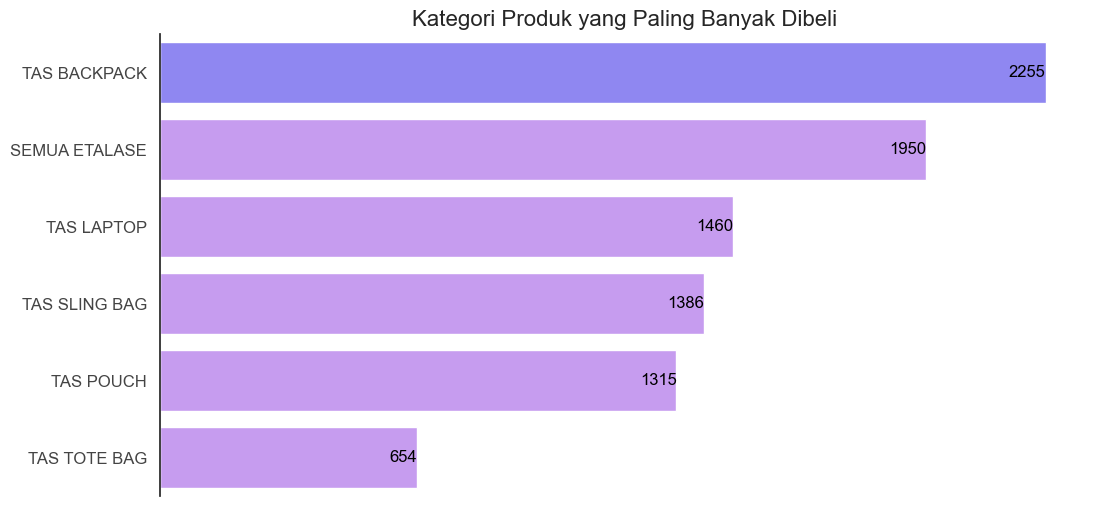

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


order_data = pd.read_csv('clean-data/data_order_tokped.csv') 
stock_data = pd.read_csv('clean-data/data_stock_exsport.csv')  
category_data = pd.read_csv('clean-data/data_category_exsport.csv')


merged_data = order_data.merge(stock_data, on='product_id', how='left')
merged_data = merged_data.merge(category_data, on='category_id', how='left')


category_sales = merged_data.groupby('category')['quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)


sns.set(style="white")


color_palette = ["#8F87F1", "#C68EFD", "#E9A5F1", "#FED2E2"]

fig, ax = plt.subplots(figsize=(12, 6))


bars = sns.barplot(
    x='quantity', 
    y='category', 
    data=category_sales, 
    color=color_palette[1] 
)


bars.patches[0].set_facecolor(color_palette[0]) 


for bar in bars.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2,  
        f'{int(bar.get_width())}', 
        ha='right', va='center', fontsize=12, fontweight='light', color='black'
    )


sns.despine(left=False, bottom=True, right=True, top=True)


ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color="#444444")
ax.set_title("Kategori Produk yang Paling Banyak Dibeli", fontsize=16, fontweight="light")
plt.show()

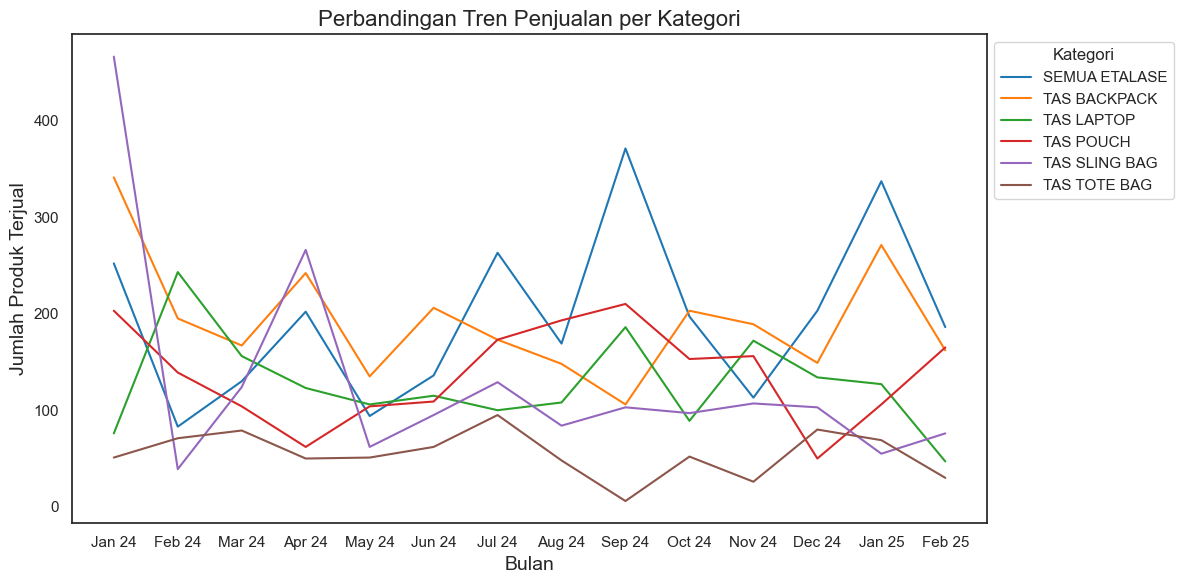

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_orders = pd.read_csv('clean-data/data_order_tokped.csv')
df_products = pd.read_csv('clean-data/data_product_exsport.csv')
df_categories = pd.read_csv('clean-data/data_category_exsport.csv')
df_stock = pd.read_csv('clean-data/data_stock_exsport.csv')

df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['year_month'] = df_orders['order_date'].dt.to_period('M')
df_sales = df_orders.merge(df_products[['product_id']], on='product_id', how='left')
df_sales = df_sales.merge(df_stock[['product_id', 'color_id', 'category_id']], on=['product_id', 'color_id'], how='left')
df_sales = df_sales.merge(df_categories[['category_id', 'category']], on='category_id', how='left')
monthly_category_sales = df_sales.groupby(['year_month', 'category'])['quantity'].sum().reset_index()
monthly_category_sales['year_month'] = monthly_category_sales['year_month'].dt.to_timestamp().dt.strftime('%b %y')


plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='quantity', hue='category', data=monthly_category_sales, palette='tab10')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Produk Terjual', fontsize=14)
plt.title('Perbandingan Tren Penjualan per Kategori', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Kategori', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


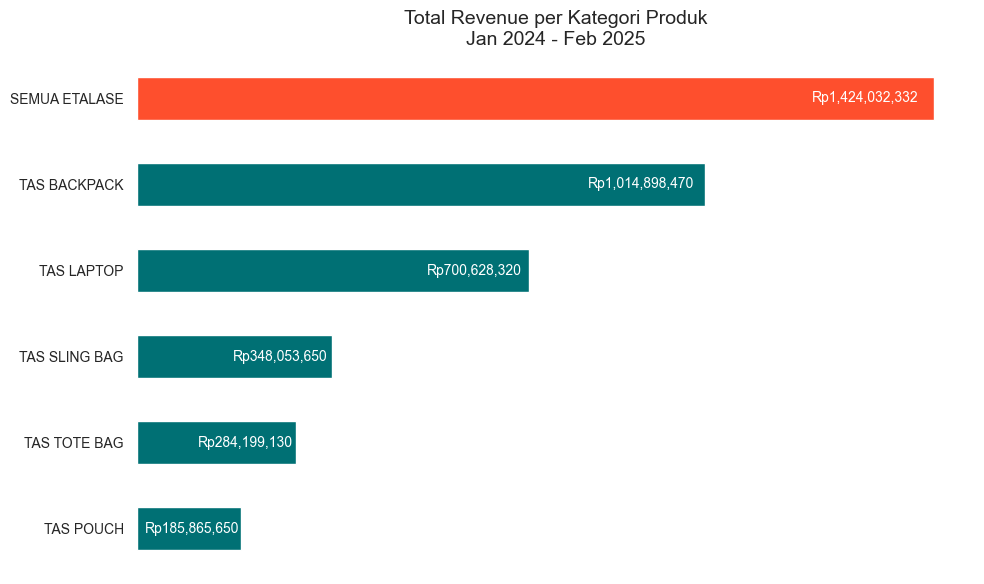

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_orders = pd.read_csv('clean-data/data_order_tokped.csv')
df_products = pd.read_csv('clean-data/data_product_exsport.csv')
df_categories = pd.read_csv('clean-data/data_category_exsport.csv')
df_stock = pd.read_csv('clean-data/data_stock_exsport.csv')


df_sales = df_orders.merge(df_products[['product_id', 'price_sale']], on='product_id', how='left')
df_sales['revenue'] = df_sales['quantity'] * df_sales['price_sale']
df_sales = df_sales.merge(df_stock[['product_id', 'color_id', 'category_id']], 
                          on=['product_id', 'color_id'], how='left')
df_sales = df_sales.merge(df_categories[['category_id', 'category']], on='category_id', how='left')
revenue_per_category = df_sales.groupby('category')['revenue'].sum().sort_values(ascending=True).reset_index()


base_color = '#007074'
highlight_color = '#FE4F2D'
max_idx = revenue_per_category['revenue'].idxmax()
colors = [highlight_color if i == max_idx else base_color for i in range(len(revenue_per_category))]

plt.figure(figsize=(10, 6))
bars = plt.barh(
    revenue_per_category['category'], 
    revenue_per_category['revenue'], 
    color=colors,
    height=0.5
)


for bar in bars:
    width = bar.get_width()
    plt.text(width * 0.98, bar.get_y() + bar.get_height()/2, 
             f'Rp{int(width):,}', 
             ha='right', va='center', fontsize=10, color='white')

plt.yticks(fontsize=10)
plt.title('Total Revenue per Kategori Produk\nJan 2024 - Feb 2025', fontsize=14)
plt.xticks([])
sns.despine(left=True, bottom=True)
plt.box(False)
plt.tight_layout()
plt.show()

Rata-rata jumlah produk terjual per kategori diskon:
discount_category
Dengan Diskon    18.618182
Tanpa Diskon     15.695652
Name: sold, dtype: float64

Hasil Uji T-Test:
T-Statistic: 1.4055
P-Value: 0.1606
❌ Tidak ada pengaruh signifikan antara diskon dan jumlah produk terjual.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13540\2242390443.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


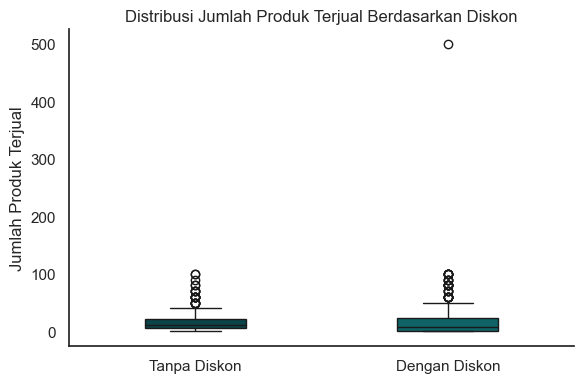

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


df_reviews = pd.read_csv('clean-data/data_review_order_tokped.csv')
df_stock = pd.read_csv('clean-data/data_stock_exsport.csv')
df_category = pd.read_csv('clean-data/data_category_exsport.csv')
df_products = pd.read_csv('clean-data/data_product_exsport.csv')

palette = ['#034C53', '#007074']
df_clean = df_products.copy()
df_clean['discount'] = df_clean['discount'].replace('No Discount', '0%')
df_clean['discount'] = df_clean['discount'].str.replace('%', '', regex=False).astype(float)
df_clean['discount_category'] = df_clean['discount'].apply(lambda x: 'Dengan Diskon' if x > 0 else 'Tanpa Diskon')
mean_sold = df_clean.groupby('discount_category')['sold'].mean()
print("Rata-rata jumlah produk terjual per kategori diskon:")
print(mean_sold)


sold_discount = df_clean[df_clean['discount_category'] == 'Dengan Diskon']['sold']
sold_no_discount = df_clean[df_clean['discount_category'] == 'Tanpa Diskon']['sold']

if len(sold_discount) > 1 and len(sold_no_discount) > 1:
    t_stat, p_val = ttest_ind(sold_discount, sold_no_discount, equal_var=False)
    print("\nHasil Uji T-Test:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_val:.4f}")

    if p_val < 0.05:
        print("✅ Diskon berpengaruh secara signifikan terhadap jumlah produk terjual.")
    else:
        print("❌ Tidak ada pengaruh signifikan antara diskon dan jumlah produk terjual.")
else:
    print("\nData tidak cukup untuk uji statistik.")
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='discount_category', 
    y='sold', 
    data=df_clean, 
    palette=palette, 
    width=0.4
)
plt.title('Distribusi Jumlah Produk Terjual Berdasarkan Diskon')
plt.xlabel('')
plt.ylabel('Jumlah Produk Terjual')
sns.despine()
plt.tight_layout()
plt.show()
